In [1]:
# Common stuff

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)
import seaborn as sns
import cv2

In [2]:
# Load data

train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)
train_label = train[:, 0]
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))
train_img.shape

(42000, 28, 28)

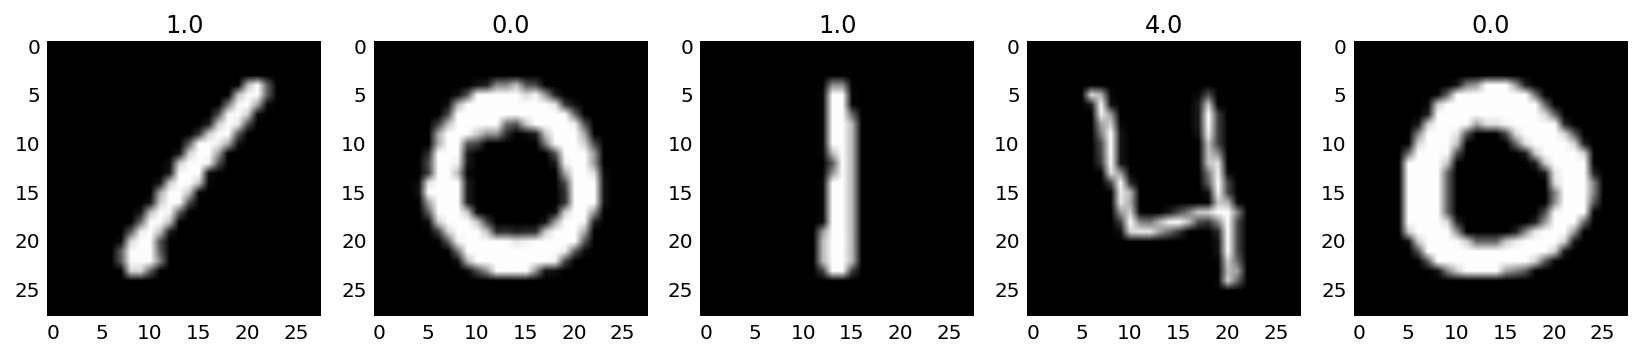

In [3]:
# Let's look at the data

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

In [5]:
# Let's make PCA + LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.1,
    random_state=420)

X = x_train.reshape(-1, 28 * 28).astype(np.float32)
X_mean = X.mean(axis=0)
X -= X_mean
cov = np.dot(X.T, X) / X.shape[0]
U, S, _ = np.linalg.svd(cov)
S_cumsum = np.cumsum(S) / np.sum(S)
S_thr = 0.97
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))
X_train_reduced = np.dot(X, U[:, :n_comp])

X = x_val.reshape(-1, 28 * 28).astype(np.float32)
X_mean = X.mean(axis=0)
X_val_reduced = np.dot(X, U[:, :n_comp])

print(X_train_reduced.shape)
print(X_val_reduced.shape)
    
clf = LogisticRegression()

scl = StandardScaler()

clf.fit(scl.fit_transform(X_train_reduced), y_train)
pred_val = clf.predict(scl.transform(X_val_reduced))

print('Accuracy: %s' % accuracy_score(y_val, pred_val))

print(classification_report(y_val, pred_val))

print(confusion_matrix(y_val, pred_val))

(37800, 212)
(4200, 212)
Accuracy: 0.626666666667
             precision    recall  f1-score   support

        0.0       0.97      0.89      0.93       412
        1.0       1.00      0.01      0.01       474
        2.0       0.93      0.79      0.85       418
        3.0       0.84      0.83      0.83       422
        4.0       0.99      0.49      0.66       392
        5.0       0.98      0.32      0.48       419
        6.0       0.96      0.85      0.91       385
        7.0       1.00      0.55      0.71       455
        8.0       0.23      1.00      0.37       402
        9.0       0.76      0.66      0.71       421

avg / total       0.87      0.63      0.64      4200

[[368   0   0   1   1   1   1   0  40   0]
 [  0   3   2  10   0   0   0   0 459   0]
 [  1   0 329   5   0   1   5   0  74   3]
 [  0   0  10 351   0   0   1   0  58   2]
 [  0   0   2   2 192   0   3   0 178  15]
 [  3   0   4  26   0 133   2   0 247   4]
 [  2   0   1   2   1   0 329   0  50   0]
 [  4   0 

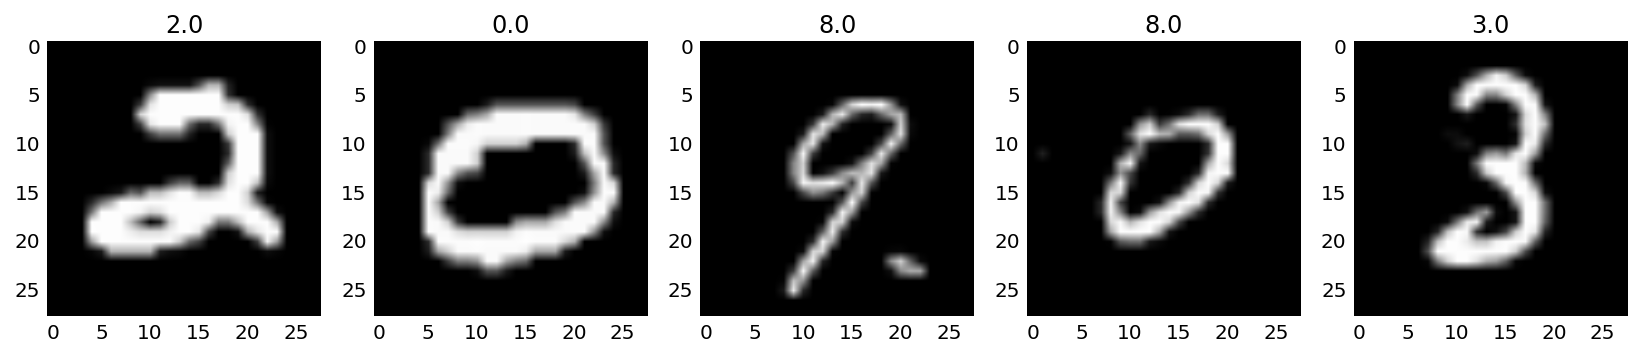

In [7]:
# ok, we got 0.62, let's try it on kaggle

X = test_img.reshape(-1, 28 * 28).astype(np.float32)
X_mean = X.mean(axis=0)
X_test_reduced = np.dot(X, U[:, :n_comp])
pred_test = clf.predict(scl.transform(X_test_reduced))

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);
    
with open('submit1.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

Here's what we got:

![title](screen1.png)